<b> Part I: Logistic Regression

Import library

In [4]:
import pandas
import mba263
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
data = pandas.read_csv('BBB.csv')
data

,acctnum,gender,state,zip,zip3,first,last,book_,nonbook_,total_,purch,child,youth,cook,do_it,refernce,art,geog,buyer
0,10001,M,NY,10605,106,49,29,109,248,357,10,3,2,2,0,1,0,2,no
1,10002,M,NY,10960,109,39,27,35,103,138,3,0,1,0,1,0,0,1,no
2,10003,F,PA,19146,191,19,15,25,147,172,2,0,0,2,0,0,0,0,no
3,10004,F,NJ,7016,70,7,7,15,257,272,1,0,0,0,0,1,0,0,no
4,10005,F,NY,10804,108,15,15,15,134,149,1,0,0,1,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59996,F,NY,11967,119,9,9,15,12,27,1,1,0,0,0,0,0,0,no
49996,59997,F,NJ,8882,88,25,5,79,294,373,7,3,0,1,1,0,1,1,no
49997,59998,M,NJ,7410,74,3,3,15,178,193,1,0,0,0,0,1,0,0,no
49998,59999,M,NJ,7090,70,49,29,98,246,344,8,2,0,1,0,2,1,2,no


In [19]:
# 'buyer' as the binary dependent variable
mba263.tabulate(data['buyer'])

,Name,Count,Frequency
0,no,45478,0.90956
1,yes,4522,0.09044


In [20]:
# Transform gender variable into dummy variable
data['female']=(data['gender']=="F")*1

In [21]:
# Transform 'buyer' variable into dummy variable
data['buyer_dummy']=(data['buyer']=="yes")*1

In [22]:
# Run logistic regression command
result=mba263.logit(data['buyer_dummy'],data[ ['last','total_','female','child','youth','cook','do_it','refernce','art','geog'] ])

Optimization terminated successfully.
         Current function value: 0.241222
         Iterations 7


In [23]:
g=result.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:            buyer_dummy   No. Observations:                50000
Model:                    Mba263Logit   Df Residuals:                    49989
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Mar 2020   Pseudo R-squ.:                  0.2053
Time:                        23:06:30   Log-Likelihood:                -12061.
converged:                       True   LL-Null:                       -15178.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6001      0.052    -30.713      0.000      -1.702      -1.498
last          -0.0947      0.003    -33.918      0.000      -0.100      -0.089
total_         0.0011      0.000      5.630      0.000       0.001       0.002
female        -0.7607      0.036    -21.272      0.000      -0.831      -0.691
child         -0.1862      0.017    -10.775      0.000      -0.220      -0.152
youth         -0.1130      0.026     -4.327      0.000      -0.164      -0.062
cook          -0.2703      0.017    -15.782      0.000      -0.304      -0.237
do_it         -0.5392      0.027    -19.994      0.000      -0.592      -0.486
refernce       0.2347      0.027      8.837      0.000       0.183       0.287
art            1.1556      0.022     52.185      0.000       1.112       1.199
geog           0.5743      0.019     30.823      0.000       0.538       0.611
==============================================================================
"""

In [24]:
mba263.odds_ratios(result)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
last,0.909634,0.002540,35.575710,0.0,0.904707,0.914562
total_,1.001117,0.000198,5.627190,0.0,1.000732,1.001502
female,0.467330,0.016712,31.873279,0.0,0.434908,0.499751
child,0.830094,0.014346,11.843363,0.0,0.802263,0.857926
youth,0.893173,0.023320,4.580965,0.0,0.847933,0.938414
cook,0.763134,0.013071,18.121158,0.0,0.737776,0.788493
do_it,0.583235,0.015727,26.499322,0.0,0.552724,0.613746
refernce,1.264514,0.033583,7.876323,0.0,1.199362,1.329665
art,3.175878,0.070327,30.939604,0.0,3.039444,3.312311
geog,1.775845,0.033086,23.449340,0.0,1.711658,1.840032


In [25]:
# Create a new variable to predict probability of purchase
data['purch_prob']=result.predict()

<b> II. Decile Analysis of Logistic Regression Results </b>

1.	Assign each customer to a decile based on his or her predicted probability of purchase.

In [80]:
data['prob_dec']=mba263.ntile(data['purch_prob'],10)

2.	Create a bar chart plotting response rate by decile (as just defined above).

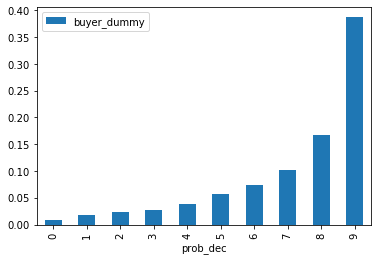

In [53]:
data[ ['buyer_dummy','prob_dec'] ].groupby('prob_dec').mean().plot(kind='bar')

3.	Generate a report showing number of customers, the number of buyers of "The Art History of Florence' and the response rate to the offer by decile for the random sample (i.e. the 50,000 customers) in the dataset.

In [62]:
data[ ['buyer_dummy','prob_dec'] ].groupby('prob_dec').describe()

buyer_dummy                                             
               count      mean       std  min  25%  50%  75%  max
prob_dec                                                         
0             5000.0  0.008400  0.091275  0.0  0.0  0.0  0.0  1.0
1             5000.0  0.018000  0.132964  0.0  0.0  0.0  0.0  1.0
2             5002.0  0.024190  0.153655  0.0  0.0  0.0  0.0  1.0
3             4998.0  0.027811  0.164448  0.0  0.0  0.0  0.0  1.0
4             5000.0  0.039200  0.194090  0.0  0.0  0.0  0.0  1.0
5             5000.0  0.056800  0.231483  0.0  0.0  0.0  0.0  1.0
6             5000.0  0.073600  0.261145  0.0  0.0  0.0  0.0  1.0
7             5000.0  0.102200  0.302941  0.0  0.0  0.0  0.0  1.0
8             5000.0  0.167200  0.373192  0.0  0.0  0.0  0.0  1.0
9             5000.0  0.387000  0.487112  0.0  0.0  0.0  1.0  1.0

Total $ spent

In [63]:
data[ ['total_','prob_dec'] ].groupby('prob_dec').describe()

total_                                                           
           count        mean         std   min    25%    50%     75%    max
prob_dec                                                                   
0         5000.0  204.341600  101.991828  15.0  126.0  201.0  279.00  479.0
1         5000.0  193.610800  102.691967  15.0  111.0  188.0  271.00  477.0
2         5002.0  191.598161   97.480008  15.0  112.0  189.0  264.75  479.0
3         4998.0  191.297319   99.334016  15.0  109.0  192.0  266.00  478.0
4         5000.0  199.130200   98.914701  15.0  120.0  200.0  275.00  479.0
5         5000.0  199.111800   98.361984  15.0  119.0  201.0  273.00  479.0
6         5000.0  207.643000   97.097314  15.0  132.0  209.0  283.00  479.0
7         5000.0  214.228400   98.687605  15.0  137.0  218.0  287.00  478.0
8         5000.0  224.869200  100.097766  15.0  148.0  228.0  299.00  476.0
9         5000.0  257.352600  100.514288  16.0  184.0  259.0  330.00  479.0

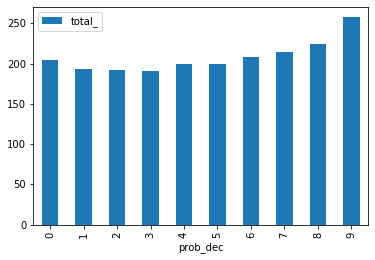

In [97]:
data[ ['total_','prob_dec'] ].groupby('prob_dec').mean().plot(kind='bar')

Months since last purchase

In [64]:
data[ ['last','prob_dec'] ].groupby('prob_dec').describe()

last                                                  
           count       mean       std  min   25%   50%   75%   max
prob_dec                                                          
0         5000.0  25.868400  7.364342  1.0  23.0  27.0  31.0  35.0
1         5000.0  17.857600  7.072491  1.0  13.0  15.0  23.0  35.0
2         5002.0  14.417833  5.770813  1.0  11.0  13.0  15.0  35.0
3         4998.0  12.372149  5.699320  1.0   9.0  11.0  15.0  35.0
4         5000.0  10.937600  5.729596  1.0   7.0  11.0  13.0  35.0
5         5000.0   9.573200  6.037577  1.0   5.0   9.0  13.0  35.0
6         5000.0   8.782800  6.017380  1.0   3.0   9.0  13.0  35.0
7         5000.0   8.618800  5.503376  1.0   5.0   9.0  13.0  35.0
8         5000.0   7.958000  5.485349  1.0   3.0   7.0  11.0  35.0
9         5000.0   7.194400  5.413323  1.0   3.0   7.0  11.0  35.0

1. Children book

In [65]:
data[ ['child','prob_dec'] ].groupby('prob_dec').describe()

child                                             
           count      mean       std  min  25%  50%  75%  max
prob_dec                                                     
0         5000.0  1.067400  1.267588  0.0  0.0  1.0  2.0  7.0
1         5000.0  0.960600  1.213648  0.0  0.0  1.0  1.0  8.0
2         5002.0  0.804678  1.059533  0.0  0.0  1.0  1.0  8.0
3         4998.0  0.761104  1.020577  0.0  0.0  0.0  1.0  7.0
4         5000.0  0.748000  1.052196  0.0  0.0  0.0  1.0  8.0
5         5000.0  0.758000  1.034239  0.0  0.0  0.0  1.0  8.0
6         5000.0  0.752600  1.027621  0.0  0.0  0.0  1.0  7.0
7         5000.0  0.791000  1.101618  0.0  0.0  0.0  1.0  7.0
8         5000.0  0.836400  1.125650  0.0  0.0  0.0  1.0  7.0
9         5000.0  1.064800  1.202036  0.0  0.0  1.0  2.0  7.0

2. Youth book

In [66]:
data[ ['youth','prob_dec'] ].groupby('prob_dec').describe()

youth                                             
           count      mean       std  min  25%  50%  75%  max
prob_dec                                                     
0         5000.0  0.463000  0.748293  0.0  0.0  0.0  1.0  5.0
1         5000.0  0.405200  0.712120  0.0  0.0  0.0  1.0  5.0
2         5002.0  0.360256  0.646282  0.0  0.0  0.0  1.0  5.0
3         4998.0  0.348139  0.631416  0.0  0.0  0.0  1.0  6.0
4         5000.0  0.364800  0.659855  0.0  0.0  0.0  1.0  5.0
5         5000.0  0.333800  0.622298  0.0  0.0  0.0  1.0  4.0
6         5000.0  0.362600  0.662427  0.0  0.0  0.0  1.0  5.0
7         5000.0  0.365400  0.663604  0.0  0.0  0.0  1.0  5.0
8         5000.0  0.392800  0.681910  0.0  0.0  0.0  1.0  5.0
9         5000.0  0.513800  0.765981  0.0  0.0  0.0  1.0  5.0

3.Cook book

In [67]:
data[ ['cook','prob_dec'] ].groupby('prob_dec').describe()

cook                                             
           count      mean       std  min  25%  50%  75%  max
prob_dec                                                     
0         5000.0  1.309400  1.464138  0.0  0.0  1.0  2.0  8.0
1         5000.0  1.118200  1.275051  0.0  0.0  1.0  2.0  8.0
2         5002.0  0.909036  1.111789  0.0  0.0  1.0  1.0  7.0
3         4998.0  0.836134  1.094567  0.0  0.0  1.0  1.0  7.0
4         5000.0  0.864800  1.106149  0.0  0.0  1.0  1.0  7.0
5         5000.0  0.820800  1.091845  0.0  0.0  0.0  1.0  7.0
6         5000.0  0.796600  1.090993  0.0  0.0  0.0  1.0  8.0
7         5000.0  0.796000  1.107894  0.0  0.0  0.0  1.0  7.0
8         5000.0  0.848200  1.151617  0.0  0.0  0.0  1.0  6.0
9         5000.0  1.066800  1.194246  0.0  0.0  1.0  2.0  7.0

4. Do it book

In [68]:
data[ ['do_it','prob_dec'] ].groupby('prob_dec').describe()

do_it                                             
           count      mean       std  min  25%  50%  75%  max
prob_dec                                                     
0         5000.0  0.772200  1.019272  0.0  0.0  0.0  1.0  7.0
1         5000.0  0.650600  0.868948  0.0  0.0  0.0  1.0  6.0
2         5002.0  0.447821  0.734893  0.0  0.0  0.0  1.0  6.0
3         4998.0  0.420968  0.710746  0.0  0.0  0.0  1.0  5.0
4         5000.0  0.394200  0.685055  0.0  0.0  0.0  1.0  5.0
5         5000.0  0.369800  0.672561  0.0  0.0  0.0  1.0  5.0
6         5000.0  0.340400  0.662281  0.0  0.0  0.0  1.0  5.0
7         5000.0  0.369800  0.674047  0.0  0.0  0.0  1.0  4.0
8         5000.0  0.393400  0.703090  0.0  0.0  0.0  1.0  4.0
9         5000.0  0.471400  0.737354  0.0  0.0  0.0  1.0  4.0

5. Reference book

In [69]:
data[ ['refernce','prob_dec'] ].groupby('prob_dec').describe()

refernce                                             
            count      mean       std  min  25%  50%  75%  max
prob_dec                                                      
0          5000.0  0.247600  0.532871  0.0  0.0  0.0  0.0  4.0
1          5000.0  0.252400  0.554938  0.0  0.0  0.0  0.0  5.0
2          5002.0  0.204918  0.503330  0.0  0.0  0.0  0.0  4.0
3          4998.0  0.227491  0.504600  0.0  0.0  0.0  0.0  5.0
4          5000.0  0.258800  0.544318  0.0  0.0  0.0  0.0  5.0
5          5000.0  0.272400  0.550144  0.0  0.0  0.0  0.0  4.0
6          5000.0  0.308200  0.591678  0.0  0.0  0.0  1.0  4.0
7          5000.0  0.383200  0.636584  0.0  0.0  0.0  1.0  5.0
8          5000.0  0.404600  0.662863  0.0  0.0  0.0  1.0  4.0
9          5000.0  0.562800  0.804105  0.0  0.0  0.0  1.0  5.0

6. Art book

In [70]:
data[ ['art','prob_dec'] ].groupby('prob_dec').describe()

art                                             
           count      mean       std  min  25%  50%  75%  max
prob_dec                                                     
0         5000.0  0.069200  0.262345  0.0  0.0  0.0  0.0  2.0
1         5000.0  0.127600  0.359088  0.0  0.0  0.0  0.0  2.0
2         5002.0  0.113954  0.343781  0.0  0.0  0.0  0.0  3.0
3         4998.0  0.132053  0.369663  0.0  0.0  0.0  0.0  3.0
4         5000.0  0.163400  0.417055  0.0  0.0  0.0  0.0  3.0
5         5000.0  0.216800  0.471850  0.0  0.0  0.0  0.0  4.0
6         5000.0  0.302400  0.534613  0.0  0.0  0.0  1.0  3.0
7         5000.0  0.480200  0.618130  0.0  0.0  0.0  1.0  4.0
8         5000.0  0.753000  0.679767  0.0  0.0  1.0  1.0  4.0
9         5000.0  1.500600  0.933903  0.0  1.0  1.0  2.0  6.0

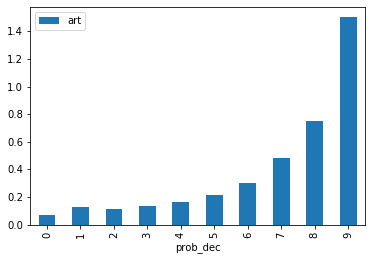

In [96]:
data[ ['art','prob_dec'] ].groupby('prob_dec').mean().plot(kind='bar')

7. Geography book

In [72]:
data[ ['geog','prob_dec'] ].groupby('prob_dec').describe()

geog                                             
           count      mean       std  min  25%  50%  75%  max
prob_dec                                                     
0         5000.0  0.291600  0.570118  0.0  0.0  0.0  0.0  4.0
1         5000.0  0.316000  0.602841  0.0  0.0  0.0  1.0  4.0
2         5002.0  0.254298  0.580378  0.0  0.0  0.0  0.0  4.0
3         4998.0  0.294718  0.596313  0.0  0.0  0.0  0.0  4.0
4         5000.0  0.386200  0.652943  0.0  0.0  0.0  1.0  5.0
5         5000.0  0.463800  0.717490  0.0  0.0  0.0  1.0  6.0
6         5000.0  0.540400  0.758210  0.0  0.0  0.0  1.0  6.0
7         5000.0  0.701000  0.813469  0.0  0.0  1.0  1.0  5.0
8         5000.0  0.890800  0.950082  0.0  0.0  1.0  1.0  6.0
9         5000.0  1.330800  1.247591  0.0  0.0  1.0  2.0  7.0

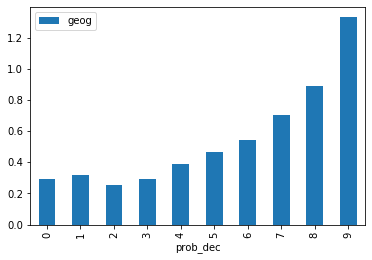

In [98]:
data[ ['geog','prob_dec'] ].groupby('prob_dec').mean().plot(kind='bar')

<b> III. Lifts and Gains

2. Create a chart showing the cumulative lift by decile.

In [77]:
data['response1']=mba263.get_means(data['buyer_dummy'],data['prob_dec'])

In [78]:
mba263.lift(data['buyer_dummy'],data['response1'])

array([427.90800531, 306.39097744, 241.92835029, 201.79124281,
       173.99380805, 152.21878225, 134.87217909, 121.35117205,
       110.07911937, 100.        ])

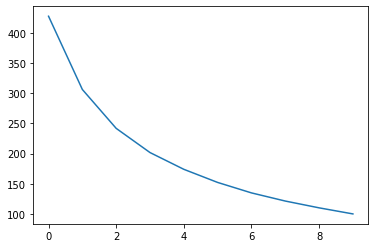

In [79]:
plt.plot(mba263.lift(data['buyer_dummy'],data['response1']))

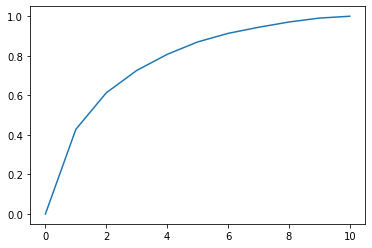

In [81]:
plt.plot(mba263.gain(data['buyer_dummy'],data['response1']))

<b> IV. Profitability analysis </b>

For the customers in the dataset, create a new variable (call it "target") with a value of 1
if the customer's predicted probability is greater than or equal to the breakeven response
rate and 0 otherwise.

In [86]:
data['target']=(data['response1']>0.0833)*1

In [93]:
datamailing = data[data['target']==1]

In [94]:
mba263.tabulate(datamailing['buyer'])

,Name,Count,Frequency
0,no,11718,0.7812
1,yes,3282,0.2188
